# Data Wrangling

Data wrangling is one of the crucial tasks in data science and analysis which includes operations like:

* Data Sorting: To rearrange values in ascending or descending order.
* Data Filtration: To create a subset of available data.
* Data Reduction: To eliminate or replace unwanted values.
* Data Access: To read or write data files.
* Data Processing: To perform aggregation, statistical, and similar operations on specific values. Ax explained before, Pandas is an open source library, specifically developed for data science and analysis. It is built upon the Numpy (to handle numeric data in tabular form) package and has inbuilt data structures to ease-up the process of data manipulation, aka data munging/wrangling.


### Exercice 0: Environment and libraries

In [1]:
import pandas as pd
import jupyter
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import tabulate

### Exercise 1: Concatenate

The goal of this exercise is to learn to concatenate DataFrames. The logic is the same for the Series.

Here are the two DataFrames to concatenate:

In [3]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 1], ['d', 2]],columns=['letter', 'number'])

##### 1. Concatenate this two DataFrames on index axis and reset the index. The index of the outputted should be RangeIndex(start=0, stop=4, step=1). Do not change the index manually.

In [11]:
df = pd.concat([df1,df2])
df.reset_index(inplace=True)
df.index

RangeIndex(start=0, stop=4, step=1)

### Exercise 2: Merge

The goal of this exercise is to learn to merge DataFrames The logic of merging DataFrames in Pandas is quite similar as the one used in SQL.

Here are the two DataFrames to merge:

In [24]:
#df1
df1_dict = {
'id': ['1', '2', '3', '4', '5'],
'Feature1': ['A', 'C', 'E', 'G', 'I'],
'Feature2': ['B', 'D', 'F', 'H', 'J']}

df1 = pd.DataFrame(df1_dict, columns = ['id', 'Feature1', 'Feature2'])

#df2
df2_dict = {
'id': ['1', '2', '6', '7', '8'],
'Feature1': ['K', 'M', 'O', 'Q', 'S'],
'Feature2': ['L', 'N', 'P', 'R', 'T']}

df2 = pd.DataFrame(df2_dict, columns = ['id', 'Feature1', 'Feature2'])
df1,df2


(  id Feature1 Feature2
 0  1        A        B
 1  2        C        D
 2  3        E        F
 3  4        G        H
 4  5        I        J,
   id Feature1 Feature2
 0  1        K        L
 1  2        M        N
 2  6        O        P
 3  7        Q        R
 4  8        S        T)

##### 1. Merge the two DataFrames to get this output:

In [33]:
df1.set_index("id").join(df2.set_index("id"),lsuffix="_x",rsuffix="_y").dropna()

,Feature1_x,Feature2_x,Feature1_y,Feature2_y
id,,,,
1,A,B,K,L
2,C,D,M,N


##### 2. Merge the two DataFrames to get this output:

In [41]:
pd.concat([df1.set_index("id"),df2.set_index("id")],axis=1).reset_index()

,id,Feature1,Feature2,Feature1,Feature2
0,1,A,B,K,L
1,2,C,D,M,N
2,3,E,F,NaN,NaN
3,4,G,H,NaN,NaN
4,5,I,J,NaN,NaN
5,6,NaN,NaN,O,P
6,7,NaN,NaN,Q,R
7,8,NaN,NaN,S,T


### Exercise 3: Merge MultiIndex

The goal of this exercise is to learn to merge DataFrames with MultiIndex. Use the code below to generate the DataFrames. market_data contains fake market data. In finance, the market is available during the trading days (business days). alternative_data contains fake alternative data from social media. This data is available every day. But, for some reasons the Data Engineer lost the last 15 days of alternative data.

##### 1. Using market_data as the reference, merge alternative_data on market_data

* reset_index is not allowed for this question

In [60]:
#generate days
all_dates = pd.date_range('2021-01-01', '2021-12-15')
business_dates = pd.bdate_range('2021-01-01', '2021-12-31')

#generate tickers
tickers = ['AAPL', 'FB', 'GE', 'AMZN', 'DAI']

#create indexs
index_alt = pd.MultiIndex.from_product([all_dates, tickers], names=['Date', 'Ticker'])
index = pd.MultiIndex.from_product([business_dates, tickers], names=['Date', 'Ticker'])

# create DFs
market_data = pd.DataFrame(index=index,data=np.random.randn(len(index), 3),columns=['Open','Close','Close_Adjusted'])

alternative_data = pd.DataFrame(index=index_alt,data=np.random.randn(len(index_alt), 2),columns=['Twitter','Reddit'])
merged = market_data.merge(alternative_data, how='left', left_index=True, right_index=True)
merged.shape

(1305, 5)

##### 2. Fill missing values with 0

In [61]:
merged.fillna(0).tail()

Open     Close  Close_Adjusted  Twitter  Reddit
Date       Ticker                                                     
2021-12-31 AAPL    0.406353  2.579316       -1.839860      0.0     0.0
           FB     -1.473005 -0.532523        0.958003      0.0     0.0
           GE     -0.869673  0.375791       -0.080158      0.0     0.0
           AMZN    0.871002 -1.067036       -0.784470      0.0     0.0
           DAI     1.079884  1.252022        2.344173      0.0     0.0

### Exercise 4: Groupby Apply

The goal of this exercise is to learn to group the data and apply a function on the groups. The use case we will work on is computing

##### 1. Create a function that uses pandas.DataFrame.clip and that replace extreme values by a given percentile. The values that are greater than the upper percentile 80% are replaced by the percentile 80%. The values that are smaller than the lower percentile 20% are replaced by the percentile 20%. This process that correct outliers is called winsorizing. I recommend to use NumPy to compute the percentiles to make sure we used the same default parameters.


In [65]:
def winsorize(df, quantiles):
    """
        df: pd.DataFrame
        quantiles: list
            ex: [0.05, 0.95]
    """
    minV = np.quantile(df,quantiles[0])
    maxV = np.quantile(df,quantiles[1])

    return df.clip(lower=minV,upper=maxV)


In [66]:
df = pd.DataFrame(range(1,11), columns=['sequence'])
print(winsorize(df, [0.20, 0.80]).to_markdown())


|    |   sequence |
|---:|-----------:|
|  0 |        2.8 |
|  1 |        2.8 |
|  2 |        3   |
|  3 |        4   |
|  4 |        5   |
|  5 |        6   |
|  6 |        7   |
|  7 |        8   |
|  8 |        8.2 |
|  9 |        8.2 |


##### 2. Now we consider that each value belongs to a group. The goal is to apply the winsorizing to each group. In this question we use winsorizing values that are common: [0.05,0.95] as percentiles. Here is the new data set:

In [77]:
groups = np.concatenate([np.ones(10), np.ones(10)+1,  np.ones(10)+2, np.ones(10)+3, np.ones(10)+4])

df = pd.DataFrame(data= zip(groups,range(1,51)),columns=["group", "sequence"])

df.groupby("group")[["sequence"]].apply(winsorize,[0.05,0.95]).head()

sequence
group            
1.0   0      1.45
      1      2.00
      2      3.00
      3      4.00
      4      5.00

### Exercise 5: Groupby Agg

The goal of this exercise is to learn to compute different type of aggregations on the groups. This small DataFrame contains products and prices.

In [94]:
cols = ["value", 	"product"]
arr = np.array([[20.45 	,"table"]
 	,[22.89 	,"chair"]
 	,[32.12 	,"chair"]
 	,[111.22 ,	"mobile phone"]
 	,[33.22 	,"table"]
 	,[100 	,"mobile phone"]
 	,[99.99 	,"table"]])

df = pd.DataFrame(arr,columns=cols)
df.value = df.value.astype(np.float64)

##### 1. Compute the min, max and mean price for each product in one single line of code.

In [101]:
# df.groupby('product').describe()[[("value","min"),("value","max"),("value","mean")]]
df.groupby('product').agg({"value":["min","max","mean"]})

value                 
                 min     max     mean
product                              
chair          22.89   32.12   27.505
mobile phone  100.00  111.22  105.610
table          20.45   99.99   51.220

### Exercise 6: Unstack

The goal of this exercise is to learn to unstack a MultiIndex Let's assume we trained a machine learning model that predicts a daily score on the companies (tickers) below. It may be very useful to unstack the MultiIndex: plot the time series, vectorize the backtest, ...

In [108]:
business_dates = pd.bdate_range('2021-01-01', '2021-12-31')

#generate tickers
tickers = ['AAPL', 'FB', 'GE', 'AMZN', 'DAI']

#create indexs
index = pd.MultiIndex.from_product([business_dates, tickers], names=['Date', 'Ticker'])

# create DFs
market_data = pd.DataFrame(index=index,data=np.random.randn(len(index), 1),columns=['Prediction'])


Prediction                                        
Ticker           AAPL      AMZN       DAI        FB        GE
Date                                                         
2021-01-01   1.314550 -0.466878  0.721375  0.522388 -1.047802
2021-01-04  -1.387955  0.905104 -0.165349  0.853347  0.419526
2021-01-05   1.032073  1.438207 -0.741530  0.919677  0.989711
2021-01-06   0.403044 -0.306159 -0.963854  0.176995 -0.472463
2021-01-07   1.591407 -0.838346  1.892104  0.577123 -0.458293

##### 1. Unstack the DataFrame.

In [123]:
unstacked = market_data.unstack(level="Ticker")
unstacked.head()

Prediction                                        
Ticker           AAPL      AMZN       DAI        FB        GE
Date                                                         
2021-01-01   1.314550 -0.466878  0.721375  0.522388 -1.047802
2021-01-04  -1.387955  0.905104 -0.165349  0.853347  0.419526
2021-01-05   1.032073  1.438207 -0.741530  0.919677  0.989711
2021-01-06   0.403044 -0.306159 -0.963854  0.176995 -0.472463
2021-01-07   1.591407 -0.838346  1.892104  0.577123 -0.458293

##### 2. Plot the 5 times series in the same plot using Pandas built-in visualization functions with a title.

<Axes: title={'center': '2021 Stock Market'}, xlabel='Date'>

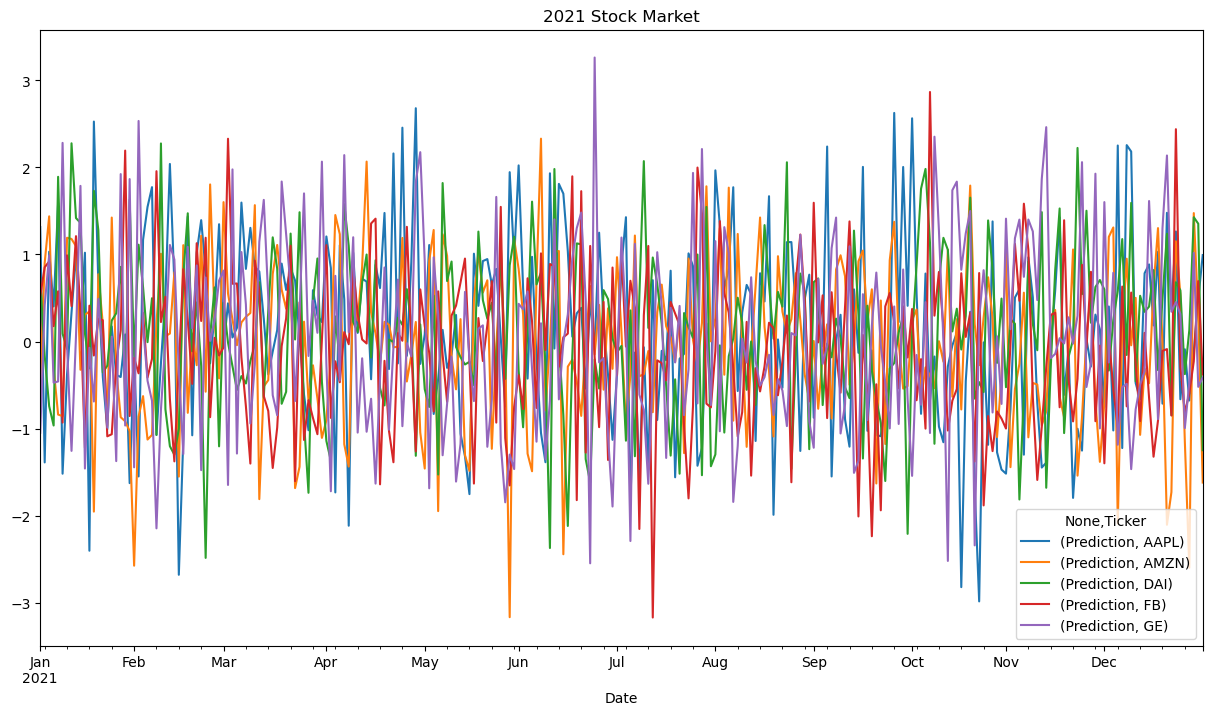

In [125]:
unstacked.plot(title="2021 Stock Market",figsize=(15,8))